# Random Forest
En este Jupyter Notebook veremos una aplicacion de *Random Forest* a la medicina utilizando una base de datos pública sobre cancer de mama. El objetivo del tutorial es dar a conocer cómo funciona el algoritmo y una de sus aplicaciones a problemáticas reales.

## Introducción
El cancer de mama representa la segunda cause de muertes de mujeres en Estados Unidos. Cerca de 246,660 mujeres son diagnositcadas cada año con cancer de mama. 

Las personas creen que un tumor en las mamas es necesariamente cancer, sin embargo, La verdadera cause de muerte es cuadno el tumor crece continuamente, infectando tejidos cercano.

Existen 2 clasificaciones de cancer de mama:
- benigno
- maligno

![cancer-exp](./imagenes/cancer-exp.jpg)

## Dataset
Para este ejemplo vamosa utilizar el dataset de cancer de mama de wisconsin ([link](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)) en el cual nos dan los siguientes datos:

1. id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 para benigno, 4 para maligno)


## Workflow
![workflow](./imagenes/workflow.png)

## Código

In [1]:
# Paquetes/modulos de python necesarios
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

- **Pandas**:
    - Nos ayuda a ordenar los datos en una tabla (dataframe) 
    - Facilita el preprocesamiento.
- **Seaborn**:
    - Crea gráficas amistosas y mejor diseñadas.
    - Confusion Matrix visual.
- **train_test_split**:
    - Divide el dataset en datos de prueba y entrenamiento.
    - Usaremos los datos de entrenamiento en la fase de entrenamiento y los de prueba una vez que tengamos el modelo entrenado para validar su precision. 
- **RandomForestClassifier**:
    - Importamos Random Forest como modelo de entrenamiento para el dataset. 
    - Este modelo nos servirá para hacer las predicciones con base al dataset.
- **accuracy_score**:
    - Calculamos la precisión de las predicciones del clasificador. 
- **confusion_matrix**:
    - Nos da una explicacion del comportamiento del clasificador con nuestros datos de prueba.

### Preprocesamiento
Este dataset no es perfecto, por lo que tenemos que preprocesarlo para cambiar el formato del archivo y completar los valores que hagan falta. Para hacer esto es necesario que abramos el documento primero y lo guardemos como CSV. En mi caso yo guarde el dataset en una carpeta llamada datasets, dependiendo de tu estructura de archivos deberás de ajustar los _path_.

In [2]:
INPUT_PATH = "./datasets/breast-cancer-wisconsin.data"
OUTPUT_PATH = "./datasets/breast-cancer-wisconsin.csv"

# Headers 
headers = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion",
           "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses",
           "CancerType"]

# Cargamos el dataset en un DataFrame
with open(INPUT_PATH, 'rb') as data:
    dataset = pd.read_csv(data)
    
# Agregamos los headers correctos al DataFrame
dataset.columns = headers

# Guardamos el dataset en un CSV
dataset.to_csv(OUTPUT_PATH, index=False)
print("Archivo Guardado...!")

Archivo Guardado...!


Revisamos que el dataset este completo

In [32]:
# Cargamos la nueva versión del dataset.
dataset = pd.read_csv(OUTPUT_PATH)

# Conseguimos las estadísticas generales del DataFrame
dataset.describe()

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BlandChromatin,NormalNucleoli,Mitoses,CancerType
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Como podemos observar, nos hace falta una columna **BareNuclei** y si vemos el CSV obsevramos que tiene datos faltantes los cuales fueron remplazados por un '?' lo que significa que no tenemos esos valores. 

![workflow](./imagenes/errores.png)

In [4]:
def corrige_valor_faltante(dataset, header_valores_faltantes, label_faltante):
    """
    Filtra un dataset con los valores faltantes.
    
    Args
    --------
    dataset: Pandas DataFrame
    header_valores_faltantes: string
    label_faltante: string
    
    Returns
    --------
    dataset: Pandas Dataframe
    """
    
    return dataset[dataset[header_valores_faltantes] != label_faltante]

In [5]:
dataset_clean = corrige_valor_faltante(dataset, headers[6], '?')
dataset_clean.sample(5)

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,CancerType
33,1075123,3,1,2,1,2,1,2,1,1,2
429,1276091,1,3,1,1,2,1,2,2,1,2
175,1201834,2,1,1,1,2,1,3,1,1,2
214,1222936,8,7,8,7,5,5,5,10,2,4
3,1017023,4,1,1,3,2,1,3,1,1,2


### Division Entrenamiento & Pruebas
Ahora generamos nuestro conjunto de entrenamiento y de pruebas. Para hacer esto utilizamos, como ya se mencionó antes, **trains_test_split**. 

In [8]:
# Qué porcentaje de los valores se va a utilizar para entrenamiento. El resto será utilizado para pruebas.
train_percentage = 0.7
feature_headers = headers[1:-1]
target_header = headers[-1]

train_x, test_x, train_y, test_y = train_test_split(dataset_clean[feature_headers], dataset_clean[target_header],
                                                        train_size=train_percentage)

C:\Users\personal\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
print("Train_x Shape:{0}".format(train_x.shape))
print("Train_y Shape:{0}".format(train_y.shape))
print("Test_x Shape:{0}".format(test_x.shape))
print("Test_y Shape:{0}".format(test_y.shape))


Train_x Shape:(477, 9)
Train_y Shape:(477,)
Test_x Shape:(205, 9)
Test_y Shape:(205,)


### Entrenamiento del Clasificador
Para continuar con lo visto en la presentación de _Arboles de Decision_ utilizamos un conjunto de arboles que utilizan entropia como criterio de decisión. A este árbol le enviamos los datos que dividimos en train para que entrene. 

In [18]:
clasificador = RandomForestClassifier(criterion='entropy')
clasificador.fit(train_x, train_y)
print(clasificador)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Predicciones
Ahora vamos a comprobar que tan preciso fue el algoritmo para predecir el tipo de cancer que le enviamos. 

In [19]:
predicciones = clasificador.predict(test_x)

In [21]:
for i in range(0,5):
    print("Resultado real: {0} \t Resultado predictor: {1}".format(list(test_y)[i], predicciones[i]))

Resultado real: 2 	 Resultado predictor: 2
Resultado real: 2 	 Resultado predictor: 2
Resultado real: 4 	 Resultado predictor: 4
Resultado real: 2 	 Resultado predictor: 2
Resultado real: 4 	 Resultado predictor: 4


In [23]:
print("Precisión Entrenamiento: {0}".format(accuracy_score(train_y, clasificador.predict(train_x))))
print("Precision Pruebas: {0}".format(accuracy_score(test_y, clasificador.predict(test_x))))

Precisión Entrenamiento: 1.0
Precision Pruebas: 0.9560975609756097


### Confusion Matrix

In [27]:
import matplotlib.pyplot as plt

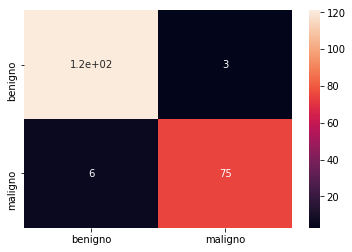

In [31]:
cm = pd.DataFrame(confusion_matrix(test_y, clasificador.predict(test_x)), 
                                   columns=['benigno', 'maligno'],
                                  index=['benigno', 'maligno'])
sns.heatmap(cm, annot=True)
plt.show()